In [1]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import gmaps
import requests
import time
import json

from scipy.stats import linregress
from scipy.stats import sem
from scipy.stats import shapiro
from config import gkey

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [2]:
# Take in all of our data and read it into pandas, change to DataFrame, select only 20y
gpd_growth_data= os.path.join("Resources/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_713083.csv")
gpd_growth_df=pd.read_csv(gpd_growth_data, skiprows=4)
gdp_growth20y_df = gpd_growth_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#gdp_growth20y_df.head()

# Melt
gdp_growth20y_dfm = gdp_growth20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#gdp_growth20y_dfm.head()

gdp_growth20y_dfm=gdp_growth20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"GDP Growth (% Annual)"})
gdp_growth20y_dfm=gdp_growth20y_dfm.drop(columns="Indicator Name")

# Take in all of our data and read it into pandas, change to DataFrame, select only 20y
gpd_per_capita_data= os.path.join("Resources/API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_712993.csv")
gpd_per_capita_df=pd.read_csv(gpd_per_capita_data, skiprows=4)
gdp_pc20y_df = gpd_per_capita_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#gdp_pc20y_df.head()
# Melt
gdp_pc20y_dfm = gdp_pc20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#gdp_pc20y_dfm.head()

gdp_pc20y_dfm=gdp_pc20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"GDP Per Capita"})
gdp_pc20y_dfm=gdp_pc20y_dfm.drop(columns="Indicator Name")
#gdp_pc20y_dfm.head()

# Merge two dataframes using a left join
merge_gdp = pd.merge(gdp_growth20y_dfm, gdp_pc20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp.head()

# Take in all of our data and read it into pandas, change to DataFrame, select only 20y
access_electricity_data= os.path.join("Resources/API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_714075.csv")
access_electricity_df=pd.read_csv(access_electricity_data, skiprows=4)
access_electricity20y_df = access_electricity_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#access_electricity20y_df.head()
# Melt
access_electricity20y_dfm = access_electricity20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#access_electricity20y_dfm.head()

access_electricity20y_dfm=access_electricity20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Access to Electricity (% population)"})
access_electricity20y_dfm=access_electricity20y_dfm.drop(columns="Indicator Name")
#access_electricity20y_dfm.head()

# Merge two dataframes using a left join
merge_gdp_elec = pd.merge(merge_gdp, access_electricity20y_dfm, on=["Country Name", "Year"], how="left")
merge_gdp_elec.head()

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population)
0,Aruba,1998,1.991988,-0.141877,100.0
1,Afghanistan,1998,NaN,NaN,NaN
2,Angola,1998,4.691146,1.364724,NaN
3,Albania,1998,8.830088,9.517153,100.0
4,Andorra,1998,3.194790,3.492427,100.0


In [3]:
# Agricultural land (% of land area)
#perc_agric_land_data= os.path.join("Resources/API_AG.LND.AGRI.ZS_DS2_en_csv_v2_713399.csv")
#perc_agric_land_df=pd.read_csv(perc_agric_land_data, skiprows=4)
#perc_agric_land20y_df = perc_agric_land_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#perc_agric_land20y_dfm = perc_agric_land20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#perc_agric_land20y_dfm = perc_agric_land20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Agricultural land (% land area)"})
#perc_agric_land20y_dfm = perc_agric_land20y_dfm.drop(columns="Indicator Name")
#perc_agric_land20y_dfm.head()
#
# Merging to previous dataframes using a left join
#merge_gdp_elec_agri = pd.merge(merge_gdp_elec, perc_agric_land20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri.head()

# Bird species (threatened)
#bird_threaten_data= os.path.join("Resources/API_EN.BIR.THRD.NO_DS2_en_csv_v2_715614.csv")
#bird_threaten_df=pd.read_csv(bird_threaten_data, skiprows=4)
#
#bird_threaten20y_df = bird_threaten_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#bird_threaten20y_dfm = bird_threaten20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#bird_threaten20y_dfm = bird_threaten20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Bird species threatened"})
#bird_threaten20y_dfm = bird_threaten20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_gdp_elec_agri_bird = pd.merge(merge_gdp_elec_agri, bird_threaten20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri_bird.head()

# CO2 emissions (kt)
CO2_emissions_data= os.path.join("Resources/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_713263.csv")
CO2_emissions_df=pd.read_csv(CO2_emissions_data, skiprows=4)

CO2_emissions20y_df = CO2_emissions_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
CO2_emissions20y_dfm = CO2_emissions20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
CO2_emissions20y_dfm = CO2_emissions20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"CO2 emissions (kt)"})
CO2_emissions20y_dfm = CO2_emissions20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_gdp_elec_agri_bird_co = pd.merge(merge_gdp_elec, CO2_emissions20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri_bird_co.head()

# CO2 emissions (metric tons per capita)
CO2_emissions_mtpc_data= os.path.join("Resources/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv")
CO2_emissions_mtpc_df=pd.read_csv(CO2_emissions_mtpc_data, skiprows=4)

CO2_emissions_mtpc20y_df = CO2_emissions_mtpc_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
CO2_emissions_mtpc20y_dfm = CO2_emissions_mtpc20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
CO2_emissions_mtpc20y_dfm = CO2_emissions_mtpc20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"CO2 emissions (metric tons per capita)"})
CO2_emissions_mtpc20y_dfm = CO2_emissions_mtpc20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_gdp_elec_agri_bird_co_co = pd.merge(merge_gdp_elec_agri_bird_co, CO2_emissions_mtpc20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gdp_elec_agri_bird_co_co.head()


# Droughts, floods, extreme temperatures (% of population)
#droughts_floods_exttemp_data= os.path.join("Resources/API_EN.CLC.MDAT.ZS_DS2_en_csv_v2_713688.csv")
#droughts_floods_exttemp_df=pd.read_csv(droughts_floods_exttemp_data, skiprows=4)
#
#droughts_floods_exttemp20y_df = droughts_floods_exttemp_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#droughts_floods_exttemp20y_dfm = droughts_floods_exttemp20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#droughts_floods_exttemp20y_dfm = droughts_floods_exttemp20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Droughts, floods, extreme temp (% population)"})
#droughts_floods_exttemp20y_dfm = droughts_floods_exttemp20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_droughts = pd.merge(merge_gdp_elec_agri_bird_co_co, droughts_floods_exttemp20y_dfm, on=["Country Name", "Year"], how="left")
#merge_droughts.head()

# Energy use per capita
#energ_use_pc_data= os.path.join("Resources/API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_715552.csv")
#energ_use_pc_df=pd.read_csv(energ_use_pc_data, skiprows=4)
#
#energ_use_pc20y_df = energ_use_pc_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#energ_use_pc20y_dfm = energ_use_pc20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#energ_use_pc20y_dfm = energ_use_pc20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Energy use per capita"})
#energ_use_pc20y_dfm = energ_use_pc20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_eupc = pd.merge(merge_droughts, energ_use_pc20y_dfm, on=["Country Name", "Year"], how="left")
#merge_eupc.head()

# Forest area (% of land area)
perc_forest_area_data= os.path.join("Resources/API_AG.LND.FRST.ZS_DS2_en_csv_v2_712984.csv")
perc_forest_area_df=pd.read_csv(perc_forest_area_data, skiprows=4)

perc_forest_area20y_df = perc_forest_area_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
perc_forest_area20y_dfm = perc_forest_area20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
perc_forest_area20y_dfm = perc_forest_area20y_dfm.rename(columns={"Country Name":"Country Name",
                                                                  "variable":"Year","value":"Forest Area (% of land)"})

perc_forest_area20y_dfm = perc_forest_area20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_forest_area = pd.merge(merge_gdp_elec_agri_bird_co_co, perc_forest_area20y_dfm, on=["Country Name", "Year"], how="left")
#merge_forest_area.head()

# Forest area (sq. km)
forest_area_data= os.path.join("Resources/API_AG.LND.FRST.K2_DS2_en_csv_v2_716262.csv")
forest_area_df=pd.read_csv(forest_area_data, skiprows=4)

forest_area20y_df = forest_area_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
forest_area20y_dfm = forest_area20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
forest_area20y_dfm = forest_area20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Forest area (sq.km)"})
forest_area20y_dfm = forest_area20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_forest_sqkm = pd.merge(merge_forest_area, forest_area20y_dfm, on=["Country Name", "Year"], how="left")
#merge_forest_sqkm.head()

# GINI
gini_data= os.path.join("Resources/API_SI.POV.GINI_DS2_en_csv_v2_713026.csv")
gini_df=pd.read_csv(gini_data, skiprows=4)

gini20y_df = gini_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
gini20y_dfm = gini20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
gini20y_dfm = gini20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"GINI"})
gini20y_dfm = gini20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_gini = pd.merge(merge_forest_sqkm, gini20y_dfm, on=["Country Name", "Year"], how="left")
#merge_gini.head()

# Life expectancy Female
#life_exp_female_data= os.path.join("Resources/API_SP.DYN.LE00.FE.IN_DS2_en_csv_v2_718212.csv")
#life_exp_female_df=pd.read_csv(life_exp_female_data, skiprows=4)
#
#life_exp_female20y_df = life_exp_female_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#life_exp_female20y_dfm = life_exp_female20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#life_exp_female20y_dfm = life_exp_female20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Life Expectancy Female"})
#life_exp_female20y_dfm = life_exp_female20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_lefemale = pd.merge(merge_gini, life_exp_female20y_dfm, on=["Country Name", "Year"], how="left")
#merge_lefemale.head()

# Life expectancy at birth
#life_expc_ab_data= os.path.join("Resources/API_SP.DYN.LE00.IN_DS2_en_csv_v2_713010.csv")
#life_expc_ab_df=pd.read_csv(life_expc_ab_data, skiprows=4)
#
#life_expc_ab20y_df = life_expc_ab_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#
# Melt, organizing, renaming
#life_expc_ab20y_dfm = life_expc_ab20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
#                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
#life_expc_ab20y_dfm = life_expc_ab20y_dfm.rename(columns={"Country Name":"Country Name", 
#                                              "variable":"Year","value":"Life Expectancy at Birth"})
#life_expc_ab20y_dfm = life_expc_ab20y_dfm.drop(columns="Indicator Name")
#
# Merging to previous dataframes using a left join
#merge_le_atb = pd.merge(merge_lefemale, life_expc_ab20y_dfm, on=["Country Name", "Year"], how="left")
#merge_le_atb.head()

# Methane emissions (kt of CO2 equivalent)
methane_emissions_data= os.path.join("Resources/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_717026.csv")
methane_emissions_df=pd.read_csv(methane_emissions_data, skiprows=4)

methane_emissions20y_df = methane_emissions_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
methane_emissions20y_dfm = methane_emissions20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
methane_emissions20y_dfm  = methane_emissions20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Methane emissions (kt of CO2 equivalent)"})
methane_emissions20y_dfm  = methane_emissions20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_methane = pd.merge(merge_gini, methane_emissions20y_dfm, on=["Country Name", "Year"], how="left")
#merge_methane.head()

# Population growth (annual %)
pop_grow_data= os.path.join("Resources/API_SP.POP.GROW_DS2_en_csv_v2_715046.csv")
pop_grow_df=pd.read_csv(pop_grow_data, skiprows=4)

pop_grow20y_df = pop_grow_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
pop_grow20y_dfm = pop_grow20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
pop_grow20y_dfm = pop_grow20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Population growth (annual)"})
pop_grow20y_dfm = pop_grow20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_popgrow = pd.merge(merge_methane, pop_grow20y_dfm, on=["Country Name", "Year"], how="left")
#merge_popgrow.head()

# Population Total
pop_total_data= os.path.join("Resources/API_SP.POP.TOTL_DS2_en_csv_v2_713131.csv")
pop_total_df=pd.read_csv(pop_total_data, skiprows=4)

pop_total20y_df = pop_total_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
pop_total20y_dfm = pop_total20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
pop_total20y_dfm = pop_total20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Population Total"})
pop_total20y_dfm = pop_total20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_pop_tot = pd.merge(merge_popgrow, pop_total20y_dfm, on=["Country Name", "Year"], how="left")
#merge_pop_tot.head()

# Renewable energy consumption (% of total final energy consumption)
renew_energy_consumpt_data= os.path.join("Resources/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_716974.csv")
renew_energy_consumpt_df=pd.read_csv(renew_energy_consumpt_data, skiprows=4)

renew_energy_consumpt20y_df = renew_energy_consumpt_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
renew_energy_consumpt20y_dfm = renew_energy_consumpt20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
renew_energy_consumpt20y_dfm = renew_energy_consumpt20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Renewable energy consumption (% of total energy consump)"})
renew_energy_consumpt20y_dfm = renew_energy_consumpt20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_renew = pd.merge(merge_pop_tot, renew_energy_consumpt20y_dfm, on=["Country Name", "Year"], how="left")
#merge_renew.head()

# Total greenhouse gas emissions (kt of CO2 equivalent)
total_ghge_data= os.path.join("Resources/API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_717015.csv")
total_ghge_df=pd.read_csv(total_ghge_data, skiprows=4)

total_ghge20y_df = total_ghge_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
total_ghge20y_dfm = total_ghge20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
total_ghge20y_dfm = total_ghge20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Total greenhouse gas emission (kt of CO2 equivalent)"})
total_ghge20y_dfm = total_ghge20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_greenhouse = pd.merge(merge_renew, total_ghge20y_dfm, on=["Country Name", "Year"], how="left")
#merge_greenhouse.head()

# Urban population_perc_of total population
urban_perc_totalpop_data= os.path.join("Resources/API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_718765.csv")
urban_perc_total_pop_df=pd.read_csv(urban_perc_totalpop_data, skiprows=4)

urban_perc_total_pop20y_df = urban_perc_total_pop_df[["Country Name","Indicator Name","1998","1999","2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]

# Melt, organizing, renaming
urban_perc_total_pop20y_dfm = urban_perc_total_pop20y_df.melt(id_vars=["Country Name", "Indicator Name"], value_vars=["1998", "1999", "2000","2001","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
urban_perc_total_pop20y_dfm = urban_perc_total_pop20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Urban population (% of Tot Pop)"})
urban_perc_total_pop20y_dfm = urban_perc_total_pop20y_dfm.drop(columns="Indicator Name")

# Merging to previous dataframes using a left join
merge_urbanpop = pd.merge(merge_greenhouse, urban_perc_total_pop20y_dfm, on=["Country Name", "Year"], how="left")
#merge_urbanpop.head()

# NOTE TO THE TEAM: Years changed. Now from 2002 to 2018 only. 
# Rule of Law
rule_law_data= os.path.join("Resources/rule_law_raw_data.csv")
rule_law_df=pd.read_csv(rule_law_data)

rule_law20y_df = rule_law_df[["Country Name","Indicator Id","2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"]]
#rule_law20y_df.head()

# Filter, selecting only Rule of Law Estimate (indicator id = 370 in the database)
rule_law20y_df = rule_law20y_df.loc[rule_law20y_df["Indicator Id"]==370]
#rule_law20y_df.head()

# Melt, organizing, renaming
rule_law20y_dfm = rule_law20y_df.melt(id_vars=["Country Name", "Indicator Id"], value_vars=["2002","2003","2004","2005","2006",
                    "2007","2008","2009","2010","2011","2012","2013","2014", "2015","2016","2017","2018"])
rule_law20y_dfm = rule_law20y_dfm.rename(columns={"Country Name":"Country Name", 
                                              "variable":"Year","value":"Rule of Law Estimate"})
rule_law20y_dfm = rule_law20y_dfm.drop(columns="Indicator Id")
#rule_law20y_dfm.head()

# Merging to previous dataframes using a inner join
merge_rules = pd.merge(merge_urbanpop, rule_law20y_dfm, on=["Country Name", "Year"], how="inner")
#merge_rules.to_csv(index=False)
merge_rules.to_csv("all_data_raw.csv")
merge_rules

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
0,Aruba,2002,-3.273647,-5.405879,100.000000,2438.555,25.671162,2.333333,4.200000,NaN,18.9009,2.229056,94992.0,0.181391,NaN,45.972,NaN
1,Afghanistan,2002,NaN,NaN,NaN,1070.764,0.047377,2.067825,13500.000000,NaN,9929.4300,4.496720,22600770.0,43.771149,13842.73810,22.261,-1.670823
2,Angola,2002,13.665687,9.943764,25.073256,12665.818,0.722959,47.708670,594783.984375,NaN,15694.8000,3.329257,17519417.0,72.125126,34490.36900,52.461,-1.617329
3,Albania,2002,4.539961,4.853922,100.000000,3751.341,1.229541,28.267882,7745.399780,31.7,2333.2200,-0.299877,3051010.0,35.896294,7503.05976,43.501,-0.762147
4,Andorra,2002,6.471015,2.354989,100.000000,531.715,7.590615,34.042553,160.000000,NaN,NaN,3.942573,70049.0,16.221819,NaN,91.641,1.252001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,Kosovo,2018,3.813314,2.991943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.794346,1845300.0,NaN,NaN,NaN,-0.370978
3447,"Yemen, Rep.",2018,-2.701475,-4.968007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.357023,28498687.0,NaN,NaN,36.642,-1.790394
3448,South Africa,2018,0.787056,-0.572080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.357697,57779622.0,NaN,NaN,66.355,-0.102496
3449,Zambia,2018,3.794901,0.815169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.912801,17351822.0,NaN,NaN,43.521,-0.344939


In [4]:
# Dopping NAN???
merge_rules_dnan = merge_rules.dropna()
merge_rules_dnan

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
3,Albania,2002,4.539961,4.853922,100.000000,3751.341,1.229541,28.267882,7745.399780,31.7,2333.220000,-0.299877,3051010.0,35.896294,7503.059760,43.501,-0.762147
6,Argentina,2002,-10.894485,-11.854777,96.109184,124714.670,3.309684,11.397126,311904.003906,53.8,95893.300000,1.083551,37681749.0,13.287978,311051.930000,89.510,-0.757995
7,Armenia,2002,13.186301,13.809650,98.000000,3043.610,1.003175,11.682473,3326.000061,34.8,2604.240000,-0.549218,3033978.0,8.899367,6460.239300,64.236,-0.423272
12,Azerbaijan,2002,9.438916,8.625351,100.000000,29614.692,3.623944,10.578325,8739.600220,25.3,10584.200000,0.746174,8171950.0,2.351899,40298.546000,51.787,-0.908657
22,Belarus,2002,5.045267,5.716082,100.000000,52405.097,5.311930,41.109304,83382.001953,30.3,13442.400000,-0.636566,9865548.0,5.762729,89727.105000,70.939,-1.335948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,Turkey,2012,4.789940,3.092660,99.992859,329560.624,4.414565,14.822447,114077.998047,40.2,78852.936000,1.632958,74653016.0,12.831685,445640.078387,71.974,0.036304
2217,Uganda,2012,3.837456,0.585700,16.132399,4070.370,0.117780,12.380810,24826.000977,41.0,21160.818000,3.181665,34559168.0,91.266176,80725.084921,20.424,-0.348162
2218,Ukraine,2012,0.238681,0.486677,99.867491,295791.221,6.487603,16.556652,95915.996094,24.7,68060.936524,-0.247099,45593300.0,2.857635,404900.304857,68.782,-0.782897
2219,Uruguay,2012,3.538179,3.230534,100.000000,8694.457,2.573106,10.151869,17767.800293,39.9,19548.606000,0.297574,3378974.0,46.924862,34237.829519,94.739,0.593178


In [5]:
# Filter, selecting only OECD members before 2002 (i.e., only 30 countries, currently there are 36 countries)
# example: df.loc[df['B'].isin(['one','three'])]
merge_rules_OECD = merge_rules.loc[merge_rules["Country Name"].isin(["Canada","United States",
                                                                "United Kingdom","Denmark","Iceland",
                                                                "Norway", "Turkey", "Spain", "Portugal", 
                                                                "France","Ireland","Belgium","Germany",
                                                                "Greece","Sweden","Switzerland","Austria",
                                                                "Netherlands","Luxembourg","Italy","Japan",
                                                                "Finland","Australia","New Zealand","Mexico",
                                                                "Czech Republic","Hungary","Poland",
                                                                "South Korea","Slovakia"])]

# print
#merge_rules_OECD
# Re-index
OECD_df = merge_rules_OECD.reset_index(drop=True)
OECD_df

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
0,Australia,2002,4.001377,2.739689,100.0,341353.696,17.370452,16.708668,1.283610e+06,NaN,132305.00,1.220564,19651400.0,8.738721,1.117450e+06,84.222,1.799990
1,Austria,2002,1.651554,1.152676,100.0,67073.097,8.299116,46.539113,3.843200e+04,NaN,8792.20,0.491980,8081957.0,24.684870,8.738669e+04,59.655,1.891656
2,Belgium,2002,1.706889,1.251989,100.0,107311.088,10.385495,22.128798,6.700600e+03,NaN,10250.10,0.448269,10332785.0,1.685710,1.380485e+05,97.241,1.374162
3,Canada,2002,3.422146,2.303577,100.0,519335.208,16.560392,38.237336,3.477116e+06,NaN,106819.00,1.087448,31360079.0,21.769837,9.086862e+05,79.888,1.693409
4,Switzerland,2002,0.162613,-0.592227,100.0,40696.366,5.586513,30.443803,1.203200e+04,NaN,5084.65,0.756469,7284753.0,18.691860,5.299742e+04,73.401,1.952487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Poland,2018,5.148018,5.137714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009801,37978548.0,NaN,NaN,60.058,0.427892
472,Portugal,2018,2.441267,2.625968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.180137,10281762.0,NaN,NaN,65.211,1.140912
473,Sweden,2018,2.225239,0.965620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.239854,10183175.0,NaN,NaN,87.431,1.895983
474,Turkey,2018,2.826776,1.305564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.490445,82319724.0,NaN,NaN,75.143,-0.319298


In [6]:
# Drop NaN???
OECD_dfdna = OECD_df.dropna()
OECD_dfdna

,Country Name,Year,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
6,Germany,2002,-0.198459,-0.366113,100.000000,829724.756,10.058672,32.580405,1.136600e+05,30.0,68773.200000,0.168128,82488495.0,4.412637,1.007405e+06,75.374,1.666165
19,Mexico,2002,-0.039844,-1.402932,97.897085,414389.335,4.075235,34.747188,6.754680e+05,50.1,112133.000000,1.373014,101684758.0,10.682781,5.676797e+05,75.365,-0.309769
28,Australia,2003,2.985940,1.722906,100.000000,336271.234,16.901959,16.677427,1.281210e+06,33.5,125529.000000,1.233997,19895400.0,7.151066,1.023668e+06,84.343,1.882049
29,Austria,2003,0.941471,0.450947,100.000000,72195.896,8.889562,46.570599,3.845800e+04,29.5,8704.100000,0.487134,8121423.0,22.578794,9.265984e+04,59.375,1.887247
30,Belgium,2003,1.037953,0.615850,100.000000,112914.264,10.882114,22.174373,6.714400e+03,28.1,9916.400000,0.418642,10376133.0,1.891080,1.440316e+05,97.296,1.365136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Norway,2012,2.703074,1.362950,100.000000,49889.535,9.940980,33.144968,1.210600e+05,25.7,16408.942152,1.313441,5018573.0,58.275850,6.353673e+04,79.874,1.958513
303,Poland,2012,1.607907,1.608150,100.000000,299931.264,7.879830,30.603489,9.371400e+04,33.0,65071.201471,-0.000239,38063164.0,10.915143,4.146069e+05,60.654,0.780411
304,Portugal,2012,-4.057294,-3.667532,100.000000,46013.516,4.376053,35.115187,3.216200e+04,36.0,12976.018286,-0.405422,10514844.0,25.517441,7.252422e+04,61.763,1.065502
305,Sweden,2012,-0.630974,-1.363358,100.000000,47047.610,4.942301,68.917857,2.807300e+05,27.6,10304.223155,0.739763,9519374.0,49.948550,6.576779e+04,85.620,1.951555


In [7]:
# Exploring the Data
OECD_dfdna.describe()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
count,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000,2.230000e+02,223.000000,223.000000,223.000000,2.230000e+02,223.000000,2.230000e+02,223.000000,223.000000
mean,1.688065,1.022157,99.963055,2.735173e+05,9.028535,30.574254,1.997675e+05,31.768610,37074.800412,0.654031,2.997441e+07,17.893024,3.616951e+05,76.862771,1.389854
std,3.174738,3.057401,0.218106,6.652245e+05,4.135659,16.870905,5.512244e+05,4.753112,66965.616624,0.659120,4.317612e+07,17.849196,8.328979e+05,10.558348,0.597821
min,-9.132494,-8.997955,97.897085,1.800497e+03,4.069560,0.333367,3.342000e+02,24.900000,332.736000,-1.853715,2.895210e+05,1.137258,3.941862e+03,56.287000,-0.667874
25%,0.366750,-0.247588,100.000000,4.809821e+04,6.080920,22.054348,7.225550e+03,27.950000,8310.145000,0.256595,5.508358e+06,6.461338,7.010672e+04,69.134500,1.007313
50%,2.003702,1.545620,100.000000,9.573804e+04,8.328176,30.875773,3.851000e+04,31.300000,12976.018286,0.504934,1.051484e+07,10.293520,1.173133e+05,77.502000,1.663715
75%,3.627250,2.778784,100.000000,3.463683e+05,10.157899,35.443931,1.580380e+05,33.950000,57449.250000,0.942038,4.646992e+07,23.168653,4.816586e+05,84.501000,1.845625
max,11.113496,9.423771,100.000000,5.789031e+06,24.824647,73.111981,3.476212e+06,50.100000,544113.000000,2.890960,3.093261e+08,77.344681,7.244272e+06,97.744000,2.013730


In [8]:
# Exploring the Data
OECD_dfdna.columns

Index(['Country Name', 'Year', 'GDP Growth (% Annual)', 'GDP Per Capita',
       'Access to Electricity (% population)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)', 'Forest Area (% of land)',
       'Forest area (sq.km)', 'GINI',
       'Methane emissions (kt of CO2 equivalent)',
       'Population growth (annual)', 'Population Total',
       'Renewable energy consumption (% of total energy consump)',
       'Total greenhouse gas emission (kt of CO2 equivalent)',
       'Urban population (% of Tot Pop)', 'Rule of Law Estimate'],
      dtype='object')

In [9]:
# Exploring the Data
OECD_dfdna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 6 to 306
Data columns (total 17 columns):
Country Name                                                223 non-null object
Year                                                        223 non-null object
GDP Growth (% Annual)                                       223 non-null float64
GDP Per Capita                                              223 non-null float64
Access to Electricity (% population)                        223 non-null float64
CO2 emissions (kt)                                          223 non-null float64
CO2 emissions (metric tons per capita)                      223 non-null float64
Forest Area (% of land)                                     223 non-null float64
Forest area (sq.km)                                         223 non-null float64
GINI                                                        223 non-null float64
Methane emissions (kt of CO2 equivalent)                    223 non-null float64
Popula

In [10]:
# Correlations among OECD members
OECD_dfdna.corr()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
GDP Growth (% Annual),1.000000,0.977150,-0.044021,0.045317,0.155824,-0.032398,0.135309,0.072389,0.108980,0.251633,0.047096,-0.020242,0.056181,0.002802,-0.025512
GDP Per Capita,0.977150,1.000000,-0.002879,0.048453,0.091581,0.000160,0.106626,0.031824,0.095531,0.040301,0.050866,-0.032496,0.056282,-0.048005,-0.052825
Access to Electricity (% population),-0.044021,-0.002879,1.000000,-0.046690,0.196577,-0.038376,-0.144357,-0.633170,-0.193520,-0.195186,-0.304524,0.074819,-0.051131,0.005707,0.518085
CO2 emissions (kt),0.045317,0.048453,-0.046690,1.000000,0.239468,0.011993,0.652928,0.330678,0.945091,-0.007019,0.892008,-0.200073,0.995550,0.019700,-0.059125
CO2 emissions (metric tons per capita),0.155824,0.091581,0.196577,0.239468,1.000000,0.035409,0.337650,-0.163743,0.205053,0.321284,0.016271,-0.226570,0.258235,0.303322,0.356964
Forest Area (% of land),-0.032398,0.000160,-0.038376,0.011993,0.035409,1.000000,0.130135,-0.074241,-0.021992,-0.149020,0.006614,0.170893,0.004529,-0.092832,0.071840
Forest area (sq.km),0.135309,0.106626,-0.144357,0.652928,0.337650,0.130135,1.000000,0.308167,0.742965,0.150528,0.546617,-0.030785,0.691467,0.089462,0.005750
GINI,0.072389,0.031824,-0.633170,0.330678,-0.163743,-0.074241,0.308167,1.000000,0.474873,0.192951,0.565569,-0.335895,0.342101,-0.326891,-0.663117
Methane emissions (kt of CO2 equivalent),0.108980,0.095531,-0.193520,0.945091,0.205053,-0.021992,0.742965,0.474873,1.000000,0.078081,0.903915,-0.220804,0.962355,-0.009650,-0.162045
Population growth (annual),0.251633,0.040301,-0.195186,-0.007019,0.321284,-0.149020,0.150528,0.192951,0.078081,1.000000,-0.010257,0.048946,0.008346,0.231907,0.125097


In [11]:
# Correlations all countries
merge_rules_dnan.corr()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
GDP Growth (% Annual),1.000000,0.965919,-0.163276,0.077681,-0.186389,-0.005898,0.043332,0.132973,0.118494,0.150007,0.127757,0.125048,0.087949,-0.232350,-0.345971
GDP Per Capita,0.965919,1.000000,-0.003382,0.098643,-0.114220,0.005332,0.059231,0.037264,0.129198,-0.090789,0.126066,0.002678,0.103155,-0.152023,-0.277488
Access to Electricity (% population),-0.163276,-0.003382,1.000000,0.105182,0.467730,-0.017017,0.066315,-0.324788,0.077198,-0.570076,0.020573,-0.719951,0.084380,0.622486,0.387905
CO2 emissions (kt),0.077681,0.098643,0.105182,1.000000,0.198393,-0.026439,0.384295,0.030608,0.897729,-0.072832,0.813706,-0.157274,0.974253,0.024518,-0.001842
CO2 emissions (metric tons per capita),-0.186389,-0.114220,0.467730,0.198393,1.000000,-0.037737,0.154130,-0.490811,0.084601,-0.258451,-0.008805,-0.549941,0.169250,0.558326,0.625489
Forest Area (% of land),-0.005898,0.005332,-0.017017,-0.026439,-0.037737,1.000000,0.228939,0.265136,0.028857,-0.039719,-0.029136,0.198164,0.020672,0.058477,0.009483
Forest area (sq.km),0.043332,0.059231,0.066315,0.384295,0.154130,0.228939,1.000000,0.194807,0.584921,-0.054454,0.290610,-0.055384,0.514035,0.138494,-0.137045
GINI,0.132973,0.037264,-0.324788,0.030608,-0.490811,0.265136,0.194807,1.000000,0.117227,0.345160,0.061531,0.320133,0.080733,-0.132069,-0.470870
Methane emissions (kt of CO2 equivalent),0.118494,0.129198,0.077198,0.897729,0.084601,0.028857,0.584921,0.117227,1.000000,-0.035620,0.895974,-0.079782,0.953025,-0.018096,-0.128623
Population growth (annual),0.150007,-0.090789,-0.570076,-0.072832,-0.258451,-0.039719,-0.054454,0.345160,-0.035620,1.000000,0.007397,0.435803,-0.052115,-0.287251,-0.252661


In [12]:
# normality test All Countries
file = merge_rules_dnan

stat, p = shapiro(file["GDP Growth (% Annual)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('GDP Growth (% Annual).Sample looks Gaussian (fail to reject H0)')
else:
	print('GDP Growth (% Annual).Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["GDP Per Capita"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('GDP Per Capita.Sample looks Gaussian (fail to reject H0)')
else:
	print('GDP Per Capita.Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["Access to Electricity (% population)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Access to Electricity (% population).Sample looks Gaussian (fail to reject H0)')
else:
	print('Access to Electricity (% population).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["CO2 emissions (kt)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('CO2 emissions (kt).Sample looks Gaussian (fail to reject H0)')
else:
	print('CO2 emissions (kt).Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["CO2 emissions (metric tons per capita)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('CO2 emissions (metric tons per capita).Sample looks Gaussian (fail to reject H0)')
else:
	print('CO2 emissions (metric tons per capita).Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["Forest Area (% of land)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Forest Area (% of land).Sample looks Gaussian (fail to reject H0)')
else:
	print('Forest Area (% of land).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Forest area (sq.km)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Forest area (sq.km).Sample looks Gaussian (fail to reject H0)')
else:
	print('Forest area (sq.km).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Forest area (sq.km)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Forest area (sq.km).Sample looks Gaussian (fail to reject H0)')
else:
	print('Forest area (sq.km).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["GINI"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('GINI.Sample looks Gaussian (fail to reject H0)')
else:
	print('GINI.Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Methane emissions (kt of CO2 equivalent)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Methane emissions (kt of CO2 equivalent).Sample looks Gaussian (fail to reject H0)')
else:
	print('Methane emissions (kt of CO2 equivalent).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Population growth (annual)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Population growth (annual).Sample looks Gaussian (fail to reject H0)')
else:
	print('Population growth (annual).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Population Total"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Population Total.Sample looks Gaussian (fail to reject H0)')
else:
	print('Population Total.Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Renewable energy consumption (% of total energy consump)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Renewable energy consumption (% of total energy consump).Sample looks Gaussian (fail to reject H0)')
else:
	print('Renewable energy consumption (% of total energy consump).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Total greenhouse gas emission (kt of CO2 equivalent)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Total greenhouse gas emission (kt of CO2 equivalent).Sample looks Gaussian (fail to reject H0)')
else:
	print('Total greenhouse gas emission (kt of CO2 equivalent).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Urban population (% of Tot Pop)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Urban population (% of Tot Pop).Sample looks Gaussian (fail to reject H0)')
else:
	print('Urban population (% of Tot Pop).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Rule of Law Estimate"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Rule of Law Estimate.Sample looks Gaussian (fail to reject H0)')
else:
	print('Rule of Law Estimate.Sample does not look Gaussian (reject H0)')

Statistics=0.956, p=0.000
GDP Growth (% Annual).Sample does not look Gaussian (reject H0)
Statistics=0.966, p=0.000
GDP Per Capita.Sample does not look Gaussian (reject H0)
Statistics=0.539, p=0.000
Access to Electricity (% population).Sample does not look Gaussian (reject H0)
Statistics=0.237, p=0.000
CO2 emissions (kt).Sample does not look Gaussian (reject H0)
Statistics=0.883, p=0.000
CO2 emissions (metric tons per capita).Sample does not look Gaussian (reject H0)
Statistics=0.968, p=0.000
Forest Area (% of land).Sample does not look Gaussian (reject H0)
Statistics=0.305, p=0.000
Forest area (sq.km).Sample does not look Gaussian (reject H0)
Statistics=0.305, p=0.000
Forest area (sq.km).Sample does not look Gaussian (reject H0)
Statistics=0.936, p=0.000
GINI.Sample does not look Gaussian (reject H0)
Statistics=0.333, p=0.000
Methane emissions (kt of CO2 equivalent).Sample does not look Gaussian (reject H0)
Statistics=0.945, p=0.000
Population growth (annual).Sample does not look Gaus

In [13]:
# normality test OECD Countries
file = OECD_dfdna

stat, p = shapiro(file["GDP Growth (% Annual)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('GDP Growth (% Annual).Sample looks Gaussian (fail to reject H0)')
else:
	print('GDP Growth (% Annual).Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["GDP Per Capita"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('GDP Per Capita.Sample looks Gaussian (fail to reject H0)')
else:
	print('GDP Per Capita.Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["Access to Electricity (% population)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Access to Electricity (% population).Sample looks Gaussian (fail to reject H0)')
else:
	print('Access to Electricity (% population).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["CO2 emissions (kt)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('CO2 emissions (kt).Sample looks Gaussian (fail to reject H0)')
else:
	print('CO2 emissions (kt).Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["CO2 emissions (metric tons per capita)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('CO2 emissions (metric tons per capita).Sample looks Gaussian (fail to reject H0)')
else:
	print('CO2 emissions (metric tons per capita).Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(file["Forest Area (% of land)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Forest Area (% of land).Sample looks Gaussian (fail to reject H0)')
else:
	print('Forest Area (% of land).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Forest area (sq.km)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Forest area (sq.km).Sample looks Gaussian (fail to reject H0)')
else:
	print('Forest area (sq.km).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Forest area (sq.km)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Forest area (sq.km).Sample looks Gaussian (fail to reject H0)')
else:
	print('Forest area (sq.km).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["GINI"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('GINI.Sample looks Gaussian (fail to reject H0)')
else:
	print('GINI.Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Methane emissions (kt of CO2 equivalent)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Methane emissions (kt of CO2 equivalent).Sample looks Gaussian (fail to reject H0)')
else:
	print('Methane emissions (kt of CO2 equivalent).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Population growth (annual)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Population growth (annual).Sample looks Gaussian (fail to reject H0)')
else:
	print('Population growth (annual).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Population Total"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Population Total.Sample looks Gaussian (fail to reject H0)')
else:
	print('Population Total.Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Renewable energy consumption (% of total energy consump)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Renewable energy consumption (% of total energy consump).Sample looks Gaussian (fail to reject H0)')
else:
	print('Renewable energy consumption (% of total energy consump).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Total greenhouse gas emission (kt of CO2 equivalent)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Total greenhouse gas emission (kt of CO2 equivalent).Sample looks Gaussian (fail to reject H0)')
else:
	print('Total greenhouse gas emission (kt of CO2 equivalent).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Urban population (% of Tot Pop)"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Urban population (% of Tot Pop).Sample looks Gaussian (fail to reject H0)')
else:
	print('Urban population (% of Tot Pop).Sample does not look Gaussian (reject H0)')

stat, p = shapiro(file["Rule of Law Estimate"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Rule of Law Estimate.Sample looks Gaussian (fail to reject H0)')
else:
	print('Rule of Law Estimate.Sample does not look Gaussian (reject H0)')

Statistics=0.959, p=0.000
GDP Growth (% Annual).Sample does not look Gaussian (reject H0)
Statistics=0.956, p=0.000
GDP Per Capita.Sample does not look Gaussian (reject H0)
Statistics=0.163, p=0.000
Access to Electricity (% population).Sample does not look Gaussian (reject H0)
Statistics=0.309, p=0.000
CO2 emissions (kt).Sample does not look Gaussian (reject H0)
Statistics=0.817, p=0.000
CO2 emissions (metric tons per capita).Sample does not look Gaussian (reject H0)
Statistics=0.891, p=0.000
Forest Area (% of land).Sample does not look Gaussian (reject H0)
Statistics=0.347, p=0.000
Forest area (sq.km).Sample does not look Gaussian (reject H0)
Statistics=0.347, p=0.000
Forest area (sq.km).Sample does not look Gaussian (reject H0)
Statistics=0.875, p=0.000
GINI.Sample does not look Gaussian (reject H0)
Statistics=0.445, p=0.000
Methane emissions (kt of CO2 equivalent).Sample does not look Gaussian (reject H0)
Statistics=0.948, p=0.000
Population growth (annual).Sample does not look Gaus

The r-squared is: -0.6631172335343306
The p-value is: 1.2693994997080348e-29
The Standard Error is: 0.4003240105571699


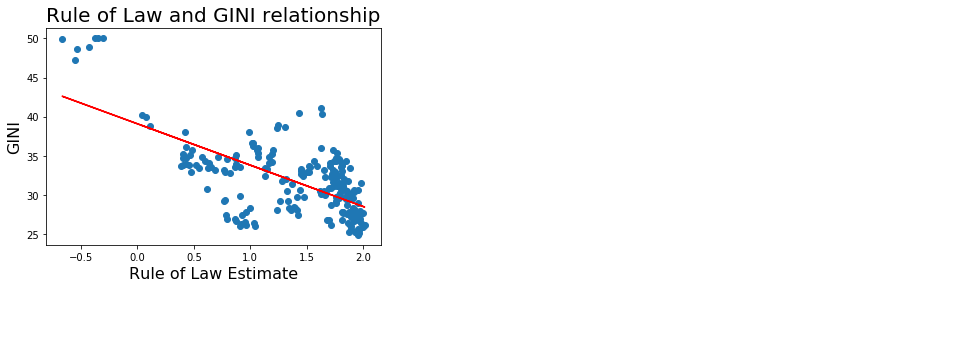

In [14]:
# Print out the r-squared value along with the plot.
OECD_dfdna = OECD_dfdna.dropna()
x_values = OECD_dfdna["Rule of Law Estimate"]
y_values = OECD_dfdna["GINI"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Rule of Law and GINI relationship", size=20)
plt.xlabel("Rule of Law Estimate", size=16)
plt.ylabel("GINI", size=16)
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")
print(f"The Standard Error is: {stderr}")

# Save the Figure
#plt.savefig("task1_1.png")

# Show the Figure
plt.show()

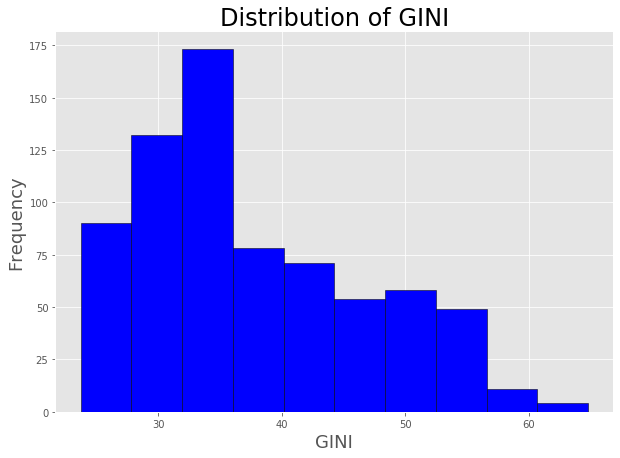

In [15]:
plt.style.use("ggplot")

merge_rules_dnan = merge_rules_dnan.dropna()
# Histogram 
merge_rules_dnan.GINI.plot(kind='hist',color='blue',edgecolor='black',figsize=(10,7))
plt.title('Distribution of GINI', size=24)
plt.xlabel('GINI', size=18)
plt.ylabel('Frequency', size=18)

# Save the Figure
#plt.savefig("task1_1.png")

# Show the Figure
plt.show()

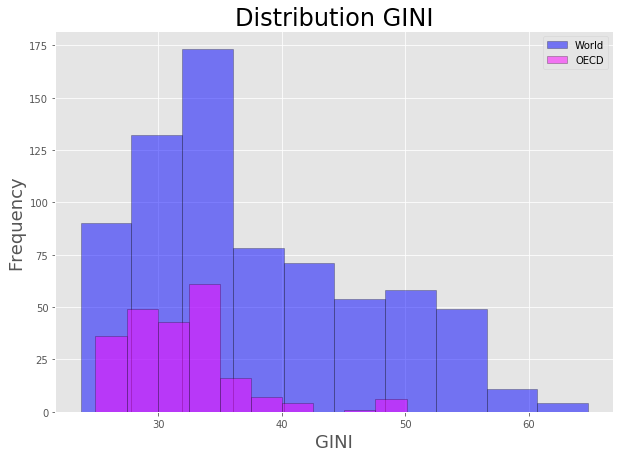

In [16]:
# Histogram of the two or more variables overlapped
merge_rules_dnan = merge_rules_dnan.dropna()
OECD_dfdna = OECD_dfdna.dropna()
merge_rules_dnan.GINI.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
OECD_dfdna.GINI.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['World','OECD'])
plt.title('Distribution GINI', size=24)
plt.xlabel('GINI', size=18)
plt.ylabel('Frequency', size=18)

# Save the Figure
#plt.savefig("task1_1.png")

# Show the Figure
plt.show()

In [17]:
# Use Pivot_table, then rearange the columns
OECD_dfdna = OECD_dfdna.dropna()
pivot_OECD = pd.pivot_table(OECD_dfdna,values="Rule of Law Estimate", index="Year", columns="Country Name")

# Preview of reformatted work
pivot_OECD.head(11)

Country Name,Australia,Austria,Belgium,Canada,Czech Republic,Denmark,Finland,France,Germany,Greece,...,Netherlands,Norway,Poland,Portugal,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Year,,,,,,,,,,,,,,,,,,,,,
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666165,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,1.882049,1.887247,1.365136,NaN,NaN,1.960584,1.999097,1.367351,1.674761,0.818208,...,NaN,1.920774,NaN,1.309731,1.280947,1.926438,NaN,NaN,NaN,NaN
2004,1.815572,1.836986,1.328163,1.706601,0.783200,1.951609,1.961037,1.442890,1.639209,0.913304,...,1.757815,1.983259,0.422650,1.249460,1.144683,1.893259,NaN,NaN,1.626520,1.435955
2005,NaN,1.859191,1.268298,NaN,0.867528,1.948244,1.963109,1.418815,1.663715,0.794582,...,1.764358,1.924565,0.480805,1.234900,1.127902,1.809585,NaN,NaN,1.569473,NaN
2006,NaN,1.913557,1.236090,NaN,0.872643,1.997572,1.973505,1.474472,1.783433,0.873663,...,1.783092,1.979785,0.404506,0.985910,1.131011,1.864799,1.817233,NaN,1.785749,NaN
2007,NaN,1.960128,1.330672,1.814706,0.905903,2.013730,1.914936,1.472339,1.772996,0.872375,...,1.787350,1.946529,0.428653,1.016893,1.168316,1.909890,1.845700,NaN,1.737427,1.627855
2008,1.770851,1.922995,1.345495,NaN,0.914494,1.966503,1.922676,1.507125,1.745706,0.862213,...,1.761363,1.970247,0.546503,1.020404,1.193509,1.931482,1.816634,NaN,1.708199,NaN
2009,NaN,1.784890,1.384073,NaN,0.962592,1.924757,1.970258,1.452676,1.655951,0.652815,...,1.814506,1.881072,0.628406,1.064921,1.162589,1.965965,1.750544,NaN,1.738985,NaN
2010,1.764966,1.800300,1.393128,1.805715,0.949479,1.897532,1.968725,1.519731,1.631237,0.630501,...,1.819352,1.897269,0.683575,1.056598,1.188944,1.955097,1.757034,0.110654,1.764103,1.638103


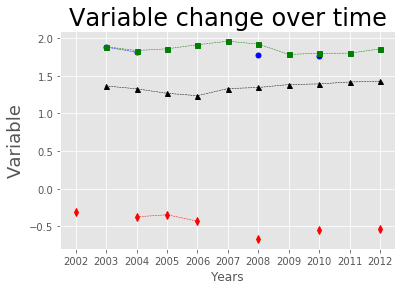

In [18]:
# Creating a plot that shows VARIABLE changes over time for each COUNTRY
plt.plot(pivot_OECD.index, pivot_OECD["Australia"], color="b", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(pivot_OECD.index, pivot_OECD["Austria"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(pivot_OECD.index, pivot_OECD["Belgium"], color="k", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.plot(pivot_OECD.index, pivot_OECD["Mexico"], color="r", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

# Proper formatting
plt.title("Variable change over time", size=24)
plt.ylabel("Variable", size=18)
plt.xlabel("Years", size=12)
plt.grid(True)

# Save the Figure
#plt.savefig("task1_1.png")

# Show the Figure
plt.show()

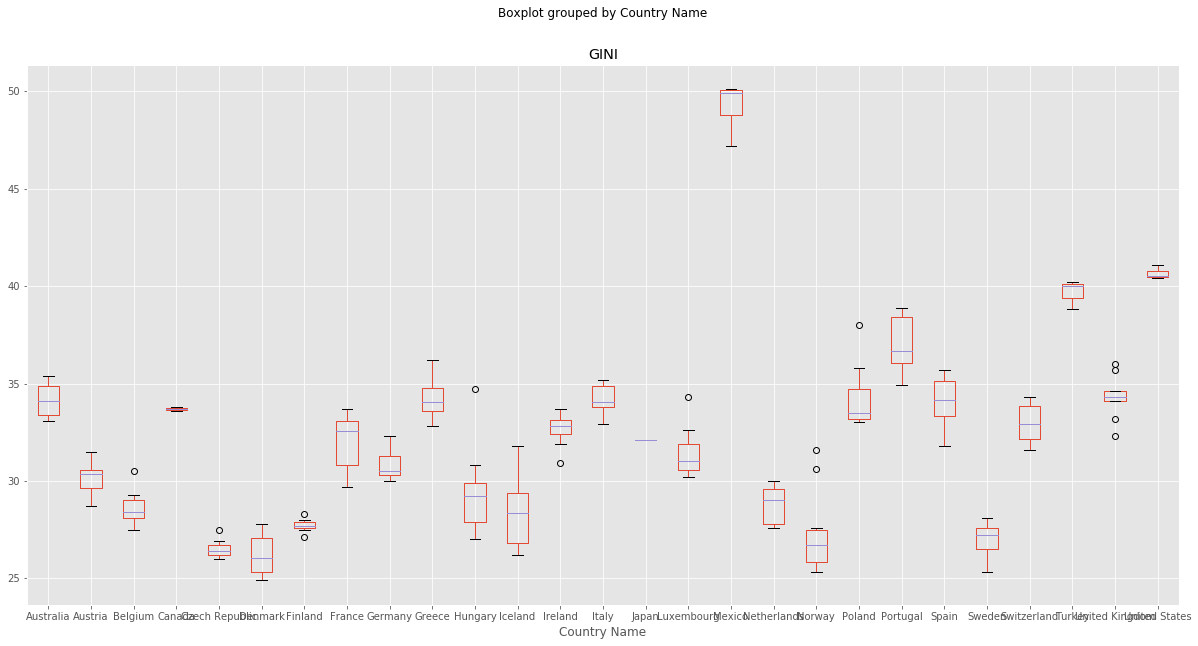

In [19]:
# Create a boxplot to compare means
OECD_dfdna = OECD_dfdna.dropna()
OECD_dfdna.boxplot("GINI", by="Country Name", figsize=(20, 10))

# Save the Figure
#plt.savefig("task1_1.png")

# Show the Figure
plt.show()

In [20]:
gp = merge_rules_dnan.groupby(["Country Name"]).mean()
gp

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
Country Name,,,,,,,,,,,,,,,
Albania,4.746842,5.209626,100.000000,4322.476250,1.454815,28.376460,7775.149994,30.325000,2492.779350,-0.436040,2.977553e+06,37.181747,8211.717818,48.638250,-0.651873
Algeria,2.900000,0.980205,99.076080,121187.016000,3.305571,0.808485,19255.999756,27.600000,48051.255000,1.883314,3.666144e+07,0.177339,172303.509195,68.236000,-0.807666
Angola,11.166138,7.116873,31.245735,25709.337000,1.185000,47.108046,587296.015625,42.700000,17292.600000,3.710531,2.169563e+07,58.107975,37396.294000,58.282000,-1.366982
Argentina,4.192748,3.130431,97.566699,170097.128636,4.274704,10.803177,295649.454901,46.627273,95475.613455,1.026894,3.967953e+07,9.755999,367735.678510,90.348545,-0.657932
Armenia,7.759806,8.314902,99.390120,4424.068818,1.508482,11.651180,3317.090926,31.672727,3082.807502,-0.510084,2.941693e+06,7.883729,9761.079206,63.738818,-0.432490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",4.373144,2.607058,98.551974,174352.648800,6.723184,54.475143,480498.000000,50.020000,57207.680000,1.712786,2.598625e+07,13.709586,256697.702000,87.928000,-1.267729
Vietnam,6.361260,5.332966,94.877688,111175.494833,1.291209,43.304114,134304.666341,36.683333,99955.090000,0.971747,8.553805e+07,42.538871,249417.365371,28.563167,-0.556716
"Yemen, Rep.",5.591748,2.612580,57.295273,20043.822000,0.996838,1.039832,5490.000000,34.700000,7787.770000,2.861969,2.010741e+07,0.894497,32666.189000,28.936000,-1.259267


In [21]:
gp.sort_values(by="Rule of Law Estimate", ascending=False).head()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
Country Name,,,,,,,,,,,,,,,
Finland,1.514761,1.108651,100.0,59875.5094,11.296687,72.987040,221986.201172,27.72,9336.186284,0.402092,5306013.5,32.895468,81662.690695,83.4172,1.957434
Denmark,0.823287,0.429161,100.0,47409.5429,8.657663,13.580008,5755.740051,26.20,7815.927639,0.393287,5483978.2,18.669161,65339.990619,86.3208,1.945714
Norway,1.603476,0.588956,100.0,48588.1167,10.194442,33.125419,120988.600586,27.32,17439.659973,1.006242,4760773.7,57.266443,69231.702174,78.4114,1.933596
Sweden,2.163167,1.508527,100.0,50148.7919,5.452439,68.633025,281422.000000,27.00,11093.137923,0.644775,9207479.4,42.913321,71815.396555,84.7412,1.914915
Austria,1.623830,1.195413,100.0,68725.4472,8.292200,46.688553,38552.600098,30.17,8365.592182,0.421617,8293520.3,27.977268,93606.027950,58.1373,1.862503


In [22]:
gp.sort_values(by="Rule of Law Estimate", ascending=False).tail()

,GDP Growth (% Annual),GDP Per Capita,Access to Electricity (% population),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest Area (% of land),Forest area (sq.km),GINI,Methane emissions (kt of CO2 equivalent),Population growth (annual),Population Total,Renewable energy consumption (% of total energy consump),Total greenhouse gas emission (kt of CO2 equivalent),Urban population (% of Tot Pop),Rule of Law Estimate
Country Name,,,,,,,,,,,,,,,
Chad,7.402268,3.576719,5.313144,460.2085,0.042146,4.604670,5.798200e+04,41.55,15544.219,3.610355,10867452.5,91.281701,120946.444352,21.8945,-1.404859
Central African Republic,-1.671677,-3.534927,8.338870,243.8555,0.059839,35.824905,2.231820e+05,49.90,61723.700,1.918489,4077273.5,83.057145,568186.577000,38.1950,-1.426090
Iraq,12.047315,8.911496,98.461056,125746.9305,4.193755,1.892898,8.250000e+03,29.05,22841.937,2.827494,29669067.5,1.908940,142515.994523,69.1255,-1.568542
"Congo, Dem. Rep.",6.912636,3.502483,12.263808,1800.4970,0.028697,68.263957,1.547578e+06,42.15,69505.139,3.241531,61044813.5,96.705326,809290.366423,39.0410,-1.686179
Zimbabwe,14.193913,12.452857,36.900000,9563.5360,0.741686,39.580198,1.531160e+05,43.20,8504.705,1.536391,12894316.0,79.574227,71561.952250,33.0150,-1.779670


In [23]:
# Define groups
high_rol = gp[gp["Rule of Law Estimate"]>=0.20]
medium_rol = gp[gp["Rule of Law Estimate"]>=-0.71]
low_rol = gp[gp["Rule of Law Estimate"]<=-0.70]

# Perform the ANOVA
#stats.f_oneway(high_rol,medium_rol, low_rol)

In [24]:
#merge_rules_dnan.columns
# Renaming for convenience
df = merge_rules_dnan.rename(columns={"Country Name": "country", "Year": "year", "GDP Growth (% Annual)": "gdp_ga",
                                     "GDP Per Capita": "gdp_pc","Access to Electricity (% population)": "access_elec",
                                      "CO2 emissions (kt)": "co2_e","CO2 emissions (metric tons per capita)": "co2_pc",
                                      "Forest Area (% of land)": "fa_pol","Forest area (sq.km)": "fa_sqkm",
                                      "GINI": "GINI","Methane emissions (kt of CO2 equivalent)": "me_kt",
                                      "Population growth (annual)": "pop_g", "Population Total": "pop_tot",
                                      "Renewable energy consumption (% of total energy consump)": "rec", 
                                      "Total greenhouse gas emission (kt of CO2 equivalent)": "tot_ghge",
                                      "Urban population (% of Tot Pop)": "urb_pop", 
                                      "Rule of Law Estimate": "rol"}, errors="raise")
df.head()

,country,year,gdp_ga,gdp_pc,access_elec,co2_e,co2_pc,fa_pol,fa_sqkm,GINI,me_kt,pop_g,pop_tot,rec,tot_ghge,urb_pop,rol
3,Albania,2002,4.539961,4.853922,100.000000,3751.341,1.229541,28.267882,7745.399780,31.7,2333.22,-0.299877,3051010.0,35.896294,7503.05976,43.501,-0.762147
6,Argentina,2002,-10.894485,-11.854777,96.109184,124714.670,3.309684,11.397126,311904.003906,53.8,95893.30,1.083551,37681749.0,13.287978,311051.93000,89.510,-0.757995
7,Armenia,2002,13.186301,13.809650,98.000000,3043.610,1.003175,11.682473,3326.000061,34.8,2604.24,-0.549218,3033978.0,8.899367,6460.23930,64.236,-0.423272
12,Azerbaijan,2002,9.438916,8.625351,100.000000,29614.692,3.623944,10.578325,8739.600220,25.3,10584.20,0.746174,8171950.0,2.351899,40298.54600,51.787,-0.908657
22,Belarus,2002,5.045267,5.716082,100.000000,52405.097,5.311930,41.109304,83382.001953,30.3,13442.40,-0.636566,9865548.0,5.762729,89727.10500,70.939,-1.335948


In [25]:
# Renaming for convenience
oecd_df = OECD_dfdna.rename(columns={"Country Name": "country", "Year": "year", "GDP Growth (% Annual)": "gdp_ga",
                                     "GDP Per Capita": "gdp_pc","Access to Electricity (% population)": "access_elec",
                                      "CO2 emissions (kt)": "co2_e","CO2 emissions (metric tons per capita)": "co2_pc",
                                      "Forest Area (% of land)": "fa_pol","Forest area (sq.km)": "fa_sqkm",
                                      "GINI": "GINI","Methane emissions (kt of CO2 equivalent)": "me_kt",
                                      "Population growth (annual)": "pop_g", "Population Total": "pop_tot",
                                      "Renewable energy consumption (% of total energy consump)": "rec", 
                                      "Total greenhouse gas emission (kt of CO2 equivalent)": "tot_ghge",
                                      "Urban population (% of Tot Pop)": "urb_pop", 
                                      "Rule of Law Estimate": "rol"}, errors="raise")
oecd_df.head()

,country,year,gdp_ga,gdp_pc,access_elec,co2_e,co2_pc,fa_pol,fa_sqkm,GINI,me_kt,pop_g,pop_tot,rec,tot_ghge,urb_pop,rol
6,Germany,2002,-0.198459,-0.366113,100.000000,829724.756,10.058672,32.580405,1.136600e+05,30.0,68773.2,0.168128,82488495.0,4.412637,1.007405e+06,75.374,1.666165
19,Mexico,2002,-0.039844,-1.402932,97.897085,414389.335,4.075235,34.747188,6.754680e+05,50.1,112133.0,1.373014,101684758.0,10.682781,5.676797e+05,75.365,-0.309769
28,Australia,2003,2.985940,1.722906,100.000000,336271.234,16.901959,16.677427,1.281210e+06,33.5,125529.0,1.233997,19895400.0,7.151066,1.023668e+06,84.343,1.882049
29,Austria,2003,0.941471,0.450947,100.000000,72195.896,8.889562,46.570599,3.845800e+04,29.5,8704.1,0.487134,8121423.0,22.578794,9.265984e+04,59.375,1.887247
30,Belgium,2003,1.037953,0.615850,100.000000,112914.264,10.882114,22.174373,6.714400e+03,28.1,9916.4,0.418642,10376133.0,1.891080,1.440316e+05,97.296,1.365136


In [26]:
#List unique values in the df['country'] column
oecd_df.country.unique()

array(['Germany', 'Mexico', 'Australia', 'Austria', 'Belgium', 'Denmark',
       'Spain', 'Finland', 'France', 'Greece', 'Ireland', 'Iceland',
       'Italy', 'Luxembourg', 'Norway', 'Portugal', 'Sweden', 'Canada',
       'Czech Republic', 'United Kingdom', 'Hungary', 'Netherlands',
       'Poland', 'United States', 'Switzerland', 'Japan', 'Turkey'],
      dtype=object)

In [ ]:
map = gmaps.Map(document.getElementById('map-canvas'),
                              {center: gmaps.LatLng(30,0),
                               zoom: 2,mapTypeId: gmaps.MapTypeId.ROADMAP})

world_geometry = gmaps.FusionTablesLayer({query: {select: 'geometry'}, map: map,
                                              suppressInfoWindows: true})

<script type='text/javascript' src='https://www.gstatic.com/charts/loader.js'></script>
  <script type='text/javascript'>
   google.charts.load('current', {'packages': ['geomap']});
   google.charts.setOnLoadCallback(drawMap);

    function drawMap() {
      var data = google.visualization.arrayToDataTable([
        ['City', 'Popularity'],
        ['New York', 200],
        ['Boston', 300],
        ['Miami', 400],
        ['Chicago', 500],
        ['Los Angeles', 600],
        ['Houston', 700]
      ]);

      var options = {};
      options['region'] = 'US';
      options['colors'] = [0xFF8747, 0xFFB581, 0xc06000]; //orange colors
      options['dataMode'] = 'markers';

      var container = document.getElementById('map_canvas');
      var geomap = new google.visualization.GeoMap(container);
      geomap.draw(data, options);
    };

  </script>
</head>

<body>
    <div id='map_canvas'></div>
</body>

</html>

In [ ]:
# geocoordinates
target_countries = oecd_df[oecd_df["country"]]

# set up a parameters dictionary
params = {"country": target_countries,"key": gkey}

# base url
base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

# convert response to json
c_data = response.json()

# Print the json (pretty printed)
print(json.dumps(c_data, indent=4, sort_keys=True))

In [ ]:
# Store locations 
locations = merge_rules_dnan[["Country Name"]]
rule_law = merge_rules_dnan["Rule of Law Estimate"].astype(float)

# Create a VARIABLE Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=rule_law, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig

In [ ]:
# Melt
gdp_growth20y_dfm= gdp_growth20y_dfm[{"Country Name":"Country Name", "variable":"Year","value":"GDP Growth (% Annual)"}]

gdp_growth20y_dfm.head()
#gdp_pc20y_dfm.head()
#access_electricity20y_dfm

In [ ]:
# Descriptive statistics GINI_world
merge_rules_dnan = merge_rules.dropna()
statistics_world = merge_rules_dnan[merge_rules_dnan['GINI']].describe()
statistics_world.rename(columns=lambda x:x+'_world',inplace=True)

# Descriptive statistics GINI_OECD
OECD_df_dnan = OECD_df.dropna()
statistics_OECD = OECD_df_dnan[OECD_df_dnan['GINI']].describe()
statistics_OECD.rename(columns=lambda x:x+'_OECD',inplace=True)

# Dataframe that contains statistics for both world and OECD
statistics = pd.concat([statistics_world,statistics_OECD], axis=1)
statistics